In [1]:
import pandas as pd
import geopandas as gpd
import mapclassify
import matplotlib.pyplot as plt

#### importing lodes.parquet
Created in the 'lodes.ipynb' notebook
Uses a threshold of 4,000 employees in a LODES to calculate employment centers

In [2]:
lodes = gpd.read_parquet("lodes.parquet")

In [3]:
lodes

,geoid,year,CFA01,CFA02,CFA03,CFA04,CFA05,CFS01,CFS02,CFS03,...,naics_55,naics_56,naics_61,naics_62,naics_71,naics_72,naics_81,naics_92,population,total_employees
214,060730004002000,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,68.0,0.0,9820.0,0.0,0.0,18.0,0.0,121,9995.0
229,060730004004000,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,4.0,4177.0,0.0,0.0,0.0,0.0,1019,4272.0
1604,060730028011010,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,23.0,3343.0,0.0,0.0,35.0,568.0,0.0,27,4007.0
3062,060730038001018,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,984,4148.0
3859,060730053021009,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,44.0,0.0,42.0,2.0,26.0,82.0,2.0,11185.0,48,12455.0
4265,060730062001000,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,21.0,0.0,0.0,0.0,162.0,66.0,0.0,0,5000.0
5937,060730083051007,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,25.0,20987.0,0.0,0.0,49.0,3.0,1.0,0,21112.0
5948,060730083051018,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,80.0,0.0,4071.0,0.0,0.0,3.0,0.0,66,4263.0
6079,060730083121001,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,28.0,46.0,3026.0,0.0,260.0,106.0,0.0,427,6133.0
6410,060730083391005,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,664.0,2.0,1.0,15.0,2.0,0.0,0,4571.0


In [4]:
lodes.explore()

In [5]:
lodes.columns

Index(['geoid', 'year', 'CFA01', 'CFA02', 'CFA03', 'CFA04', 'CFA05', 'CFS01',
       'CFS02', 'CFS03', 'CFS04', 'CFS05', 'aland20', 'awater20',
       'create_date', 'earnings_1251_3333', 'earnings_over_3333',
       'earnings_under_1250', 'education_bachelors', 'education_hs',
       'education_lths', 'education_some_college', 'employees_30_54',
       'employees_55plus', 'employees_asian', 'employees_black',
       'employees_female', 'employees_hawaiian_pi', 'employees_hispanic',
       'employees_male', 'employees_native_american', 'employees_not_hispanic',
       'employees_twoplus_races', 'employees_under_30', 'employees_white',
       'geometry', 'housing_units', 'naics_11', 'naics_21', 'naics_22',
       'naics_23', 'naics_31_33', 'naics_42', 'naics_44_45', 'naics_48_49',
       'naics_51', 'naics_52', 'naics_53', 'naics_54', 'naics_55', 'naics_56',
       'naics_61', 'naics_62', 'naics_71', 'naics_72', 'naics_81', 'naics_92',
       'population', 'total_employees'],
      dtyp

### Table of Names for NAICS columns
##### North American Industry Classification System
###### These numbers refer to distinct sectors of the productive economy

11 -- Agriculture, Forestry, Fishing and Hunting

21 -- Mining, Quarrying, and Oil and Gas Extraction

22 -- Utilities

23 -- Construction

31_33 -- Manufacturing

42 -- Wholesale Trade

44_45 -- Retail Trade

48_49 -- Transportation and Warehousing

51 -- Information

52 -- Finance and Insurance

53 -- Real Estate and Rental and Licensing

54 -- Professional, Scientific, and Technical Services

55 -- Management of Companies and Enterprises

56 -- Administrative and Support and Waste Managment

61 -- Educational services

62 -- Health Care and Social Assistance

71 -- Arts, Entertainment, and Recreation

72 -- Accommodation and Food Services

81 -- Other Services (except Public Administration)

92 -- Public Administration

CFA Firm Age: 
    CFA01: 0-1,
    CFA02: 2-3,
    CFA03: 4-5,
    CFA04: 6-10,
    CFA05: 11+

CFS Firm Size:
    CFS01: 0-19,
    CFS02: 20-49,
    CFS03: 50-249,
    CFS04: 250-499, 
    CFS05: 500+

In [6]:
# None of our columns for information on Firm Size or Firm Age have quantitative data 
# All are at values of 0.0

firms = ['CFA01', 'CFA02', 'CFA03', 'CFA04', 'CFA05',
         'CFS01', 'CFS02', 'CFS03', 'CFS04', 'CFS05']

In [7]:
lodes.drop(columns=firms, inplace=True)

In [8]:
# We will be renaming our geodataframe's columns to more descriptive shorthand names.
# This will allow you to quickly understand which NAICS refers to what industry in your tables and tooltips

lodes = lodes.rename(columns={
    'naics_11':'agri_for_fish', 
    'naics_21':'oil_gas', 
    'naics_22':'utilities',
    'naics_23':'construction', 
    'naics_31_33':'manufacturing', 
    'naics_42':'wholesale',
    'naics_44_45':'retail', 
    'naics_48_49':'transport', 
    'naics_51':'info',
    'naics_52':'fin_ins', 
    'naics_53':'estate', 
    'naics_54':'pro_sci_tech',
    'naics_55':'mgmt_entrpr', 
    'naics_56':'admin_supp_waste', 
    'naics_61':'edu_services',
    'naics_62':'healthcare_social', 
    'naics_71':'arts_ent_rec', 
    'naics_72':'accom_food',
    'naics_81':'others', 
    'naics_92':'pubadmin'})

In [9]:
lodes

,geoid,year,aland20,awater20,create_date,earnings_1251_3333,earnings_over_3333,earnings_under_1250,education_bachelors,education_hs,...,mgmt_entrpr,admin_supp_waste,edu_services,healthcare_social,arts_ent_rec,accom_food,others,pubadmin,population,total_employees
214,060730004002000,2021,320002,0,20231016.0,1631.0,7012.0,1352.0,3266.0,1347.0,...,2.0,68.0,0.0,9820.0,0.0,0.0,18.0,0.0,121,9995.0
229,060730004004000,2021,375214,0,20231016.0,742.0,3291.0,239.0,1174.0,717.0,...,0.0,3.0,4.0,4177.0,0.0,0.0,0.0,0.0,1019,4272.0
1604,060730028011010,2021,5330,0,20231016.0,744.0,2448.0,815.0,1620.0,563.0,...,0.0,23.0,3343.0,0.0,0.0,35.0,568.0,0.0,27,4007.0
3062,060730038001018,2021,119583,0,20231016.0,502.0,3530.0,116.0,542.0,840.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,984,4148.0
3859,060730053021009,2021,49150,0,20231016.0,808.0,11013.0,634.0,3459.0,2196.0,...,44.0,0.0,42.0,2.0,26.0,82.0,2.0,11185.0,48,12455.0
4265,060730062001000,2021,2750758,0,20231016.0,1667.0,2575.0,758.0,1152.0,975.0,...,0.0,21.0,0.0,0.0,0.0,162.0,66.0,0.0,0,5000.0
5937,060730083051007,2021,47116,0,20231016.0,3599.0,14234.0,3279.0,7181.0,2678.0,...,0.0,25.0,20987.0,0.0,0.0,49.0,3.0,1.0,0,21112.0
5948,060730083051018,2021,227268,0,20231016.0,325.0,3877.0,61.0,2425.0,270.0,...,0.0,80.0,0.0,4071.0,0.0,0.0,3.0,0.0,66,4263.0
6079,060730083121001,2021,5352421,0,20231016.0,857.0,4957.0,319.0,2347.0,812.0,...,0.0,28.0,46.0,3026.0,0.0,260.0,106.0,0.0,427,6133.0
6410,060730083391005,2021,2938563,24774,20231016.0,343.0,4023.0,205.0,1957.0,662.0,...,0.0,0.0,664.0,2.0,1.0,15.0,2.0,0.0,0,4571.0


In [10]:
# A list for quickly iterating through a For loop

industries = ['agri_for_fish', 'oil_gas', 'utilities',
    'construction', 'manufacturing', 'wholesale',
    'retail', 'transport', 'info',
    'fin_ins', 'estate', 'pro_sci_tech',
    'mgmt_entrpr', 'admin_supp_waste', 'edu_services',
    'healthcare_social', 'arts_ent_rec', 'accom_food',
    'others', 'pubadmin' ]

/opt/tljh/user/lib/python3.10/site-packages/mapclassify/classifiers.py:1592: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 2.
  self.bins = quantile(y, k=k)
/opt/tljh/user/lib/python3.10/site-packages/mapclassify/classifiers.py:1592: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 2.
  self.bins = quantile(y, k=k)
/opt/tljh/user/lib/python3.10/site-packages/mapclassify/classifiers.py:1592: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 2.
  self.bins = quantile(y, k=k)
/opt/tljh/user/lib/python3.10/site-packages/mapclassify/classifiers.py:1592: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 4.
  self.bins = quantile(y, k=k)
/opt/tljh/user/lib/python3.10/site-packages/mapclassify/classifiers.py:1592: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 4.
  self.bins = quantile(y, k=k)
/opt/tljh/user/lib/python3.10/site-packages/mapcla

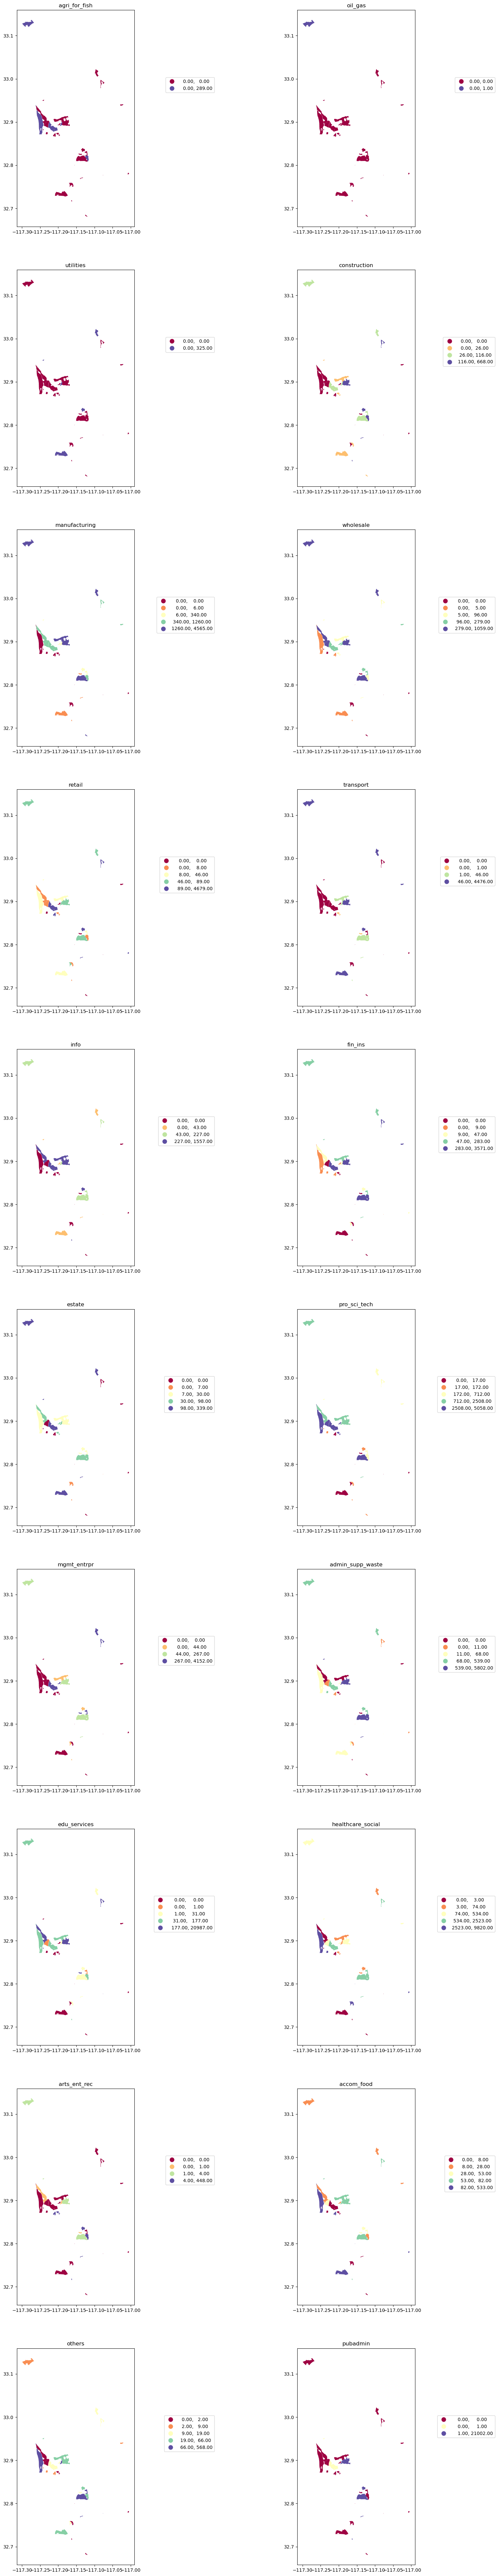

In [11]:
# Unfortunately, for many of our industries we do not have enough values fill as specified bins for each industry
# Those plots with few bins indicates minimal presence of that industry throughout the entirety of your data

fig, axs = plt.subplots(nrows=10, ncols=2, figsize=(20, 100))

axs=axs.flatten()

for i, col in enumerate(industries):
    ax = axs[i]
    lodes.plot(column=col, ax=ax, scheme='Quantiles',
                       k=5, cmap='Spectral', legend=True,
                       legend_kwds={'bbox_to_anchor': (1.7, 0.7), "fmt": "{:.2f}"})
    ax.set_title(col)

In [12]:
# This column "primary" refers to the number of employees of the most populous industry for an employment center
# It finds the max value for a specified list of columns (NAICS industry label) across each employment center (row or record)

lodes['primary'] = lodes[industries].max(axis=1)
lodes

,geoid,year,aland20,awater20,create_date,earnings_1251_3333,earnings_over_3333,earnings_under_1250,education_bachelors,education_hs,...,admin_supp_waste,edu_services,healthcare_social,arts_ent_rec,accom_food,others,pubadmin,population,total_employees,primary
214,060730004002000,2021,320002,0,20231016.0,1631.0,7012.0,1352.0,3266.0,1347.0,...,68.0,0.0,9820.0,0.0,0.0,18.0,0.0,121,9995.0,9820.0
229,060730004004000,2021,375214,0,20231016.0,742.0,3291.0,239.0,1174.0,717.0,...,3.0,4.0,4177.0,0.0,0.0,0.0,0.0,1019,4272.0,4177.0
1604,060730028011010,2021,5330,0,20231016.0,744.0,2448.0,815.0,1620.0,563.0,...,23.0,3343.0,0.0,0.0,35.0,568.0,0.0,27,4007.0,3343.0
3062,060730038001018,2021,119583,0,20231016.0,502.0,3530.0,116.0,542.0,840.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,984,4148.0,4092.0
3859,060730053021009,2021,49150,0,20231016.0,808.0,11013.0,634.0,3459.0,2196.0,...,0.0,42.0,2.0,26.0,82.0,2.0,11185.0,48,12455.0,11185.0
4265,060730062001000,2021,2750758,0,20231016.0,1667.0,2575.0,758.0,1152.0,975.0,...,21.0,0.0,0.0,0.0,162.0,66.0,0.0,0,5000.0,4476.0
5937,060730083051007,2021,47116,0,20231016.0,3599.0,14234.0,3279.0,7181.0,2678.0,...,25.0,20987.0,0.0,0.0,49.0,3.0,1.0,0,21112.0,20987.0
5948,060730083051018,2021,227268,0,20231016.0,325.0,3877.0,61.0,2425.0,270.0,...,80.0,0.0,4071.0,0.0,0.0,3.0,0.0,66,4263.0,4071.0
6079,060730083121001,2021,5352421,0,20231016.0,857.0,4957.0,319.0,2347.0,812.0,...,28.0,46.0,3026.0,0.0,260.0,106.0,0.0,427,6133.0,3026.0
6410,060730083391005,2021,2938563,24774,20231016.0,343.0,4023.0,205.0,1957.0,662.0,...,0.0,664.0,2.0,1.0,15.0,2.0,0.0,0,4571.0,2508.0


In [13]:
# Calculates the percentage value of most populous industry for an employment center's total number of employees
# Useful for later plotting as it creates a neat [0.0, 1.0] range of values

lodes['pct'] = lodes['primary'] / lodes['total_employees']
lodes

,geoid,year,aland20,awater20,create_date,earnings_1251_3333,earnings_over_3333,earnings_under_1250,education_bachelors,education_hs,...,edu_services,healthcare_social,arts_ent_rec,accom_food,others,pubadmin,population,total_employees,primary,pct
214,060730004002000,2021,320002,0,20231016.0,1631.0,7012.0,1352.0,3266.0,1347.0,...,0.0,9820.0,0.0,0.0,18.0,0.0,121,9995.0,9820.0,0.982491
229,060730004004000,2021,375214,0,20231016.0,742.0,3291.0,239.0,1174.0,717.0,...,4.0,4177.0,0.0,0.0,0.0,0.0,1019,4272.0,4177.0,0.977762
1604,060730028011010,2021,5330,0,20231016.0,744.0,2448.0,815.0,1620.0,563.0,...,3343.0,0.0,0.0,35.0,568.0,0.0,27,4007.0,3343.0,0.834290
3062,060730038001018,2021,119583,0,20231016.0,502.0,3530.0,116.0,542.0,840.0,...,0.0,0.0,0.0,0.0,0.0,0.0,984,4148.0,4092.0,0.986500
3859,060730053021009,2021,49150,0,20231016.0,808.0,11013.0,634.0,3459.0,2196.0,...,42.0,2.0,26.0,82.0,2.0,11185.0,48,12455.0,11185.0,0.898033
4265,060730062001000,2021,2750758,0,20231016.0,1667.0,2575.0,758.0,1152.0,975.0,...,0.0,0.0,0.0,162.0,66.0,0.0,0,5000.0,4476.0,0.895200
5937,060730083051007,2021,47116,0,20231016.0,3599.0,14234.0,3279.0,7181.0,2678.0,...,20987.0,0.0,0.0,49.0,3.0,1.0,0,21112.0,20987.0,0.994079
5948,060730083051018,2021,227268,0,20231016.0,325.0,3877.0,61.0,2425.0,270.0,...,0.0,4071.0,0.0,0.0,3.0,0.0,66,4263.0,4071.0,0.954961
6079,060730083121001,2021,5352421,0,20231016.0,857.0,4957.0,319.0,2347.0,812.0,...,46.0,3026.0,0.0,260.0,106.0,0.0,427,6133.0,3026.0,0.493396
6410,060730083391005,2021,2938563,24774,20231016.0,343.0,4023.0,205.0,1957.0,662.0,...,664.0,2.0,1.0,15.0,2.0,0.0,0,4571.0,2508.0,0.548676


In [14]:
# This tooltip trims down the unnecessary columns that are not relevant to the analysis of industry specialization

lodes.explore(column='pct', tooltip=industries)